# Analyzing the Stroop Effect

*This is an excercise in my <a href="https://www.udacity.com/course/data-analyst-nanodegree">Udacity Nanodegree in Data Analysis</a>*

Words are so natural to us that we don't think about them any more. They are the underlying structure to the way we think and communicate, but what we often don't think about is how involuntary that process really is. As we grow older and become literate we restructure our understanding of the world to fit these words. As psychologists say <a href="http://www.independent.co.uk/news/science/you-cant-not-read-this-sentence-brainwashing-quora-a6882226.html">language is really a form of brainwashing.</a> This one of the ways to explain the Stroop effect, a well known psychological hack where people struggle to identify colors if the text in which it is written doesn't match. For example the word "blue" written in yellow. If you've taken this test yourself (<a href="http://opencoglab.org/stroop/">you can here</a>), this result might seem obvious to you because it is naturally so hard to complete the task. But intuitively this is quite strange - why are colors, which are a seemingly more basic thing to be able to identify, less cognitively accessible than words, which are a social construct. If you're interested is piqued you can read more about the Stroop effect and its implications <a href="https://imotions.com/blog/the-stroop-effect/">here</a>. In this exercise we'll take a step back to some experimental data to verify that the effect exists in the first place. This data was provided as part of the <a href="https://www.udacity.com/course/data-analyst-nanodegree">Data Analyst Nanodegree</a>, as were the instructions below. 

The data is split into two groups: Congruent (the time is took participants to complete the test when colors and words matched) and Incongruent (the time it took them when the color and words didn't match). If you want to compare your own score you can <a href="http://opencoglab.org/stroop/">here</a> before we get started.

1) What is the independent variable? What is the dependent variable?

The time the subjects take to complete the test depends on whether the words shown to them are congruent or incongruent, thus the dependent variable is the time to complete the test and the independent variable is the type of test given. 

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Given previous research, it is reasonable to believe that participants will take longer to name the correct color when it does not match the word it is written in (i.e. an incongruent combination). Each record represents a single participant, thus a paired t-test is the right choice to determine if differences within the group are statistically significant, for which there would need to be a pvalue < 0.05. This would indicate that the sample results are < 5% likely to have occured by chance and thus 95% likely to represent their respective populations.

* Null Hypthothesis (H<sub>0</sub>): Subjects identify the congruent and incongruent combinations at the same speed, such that the means for the two tests are equal.
* Alternative Hypothesis (H<sub>1</sub>): Subject identify the incongruent combinations at a slower speed than the congruent combinations, such that the mean for incongruent ($\mu_{i}$) is greater than congruent ($\mu_{c}$).

$$ 
H_{0} : \mu_{i} - \mu_{c} = 0 \\
H_{1} : \mu_{i} - \mu_{c} > 0
$$

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [22]:
# Perform the analysis here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("stroopdata.csv")
print(df.shape)
df.head()

(24, 2)


,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [16]:
print(df.describe())
congruent_median = df.Congruent.median()
congruent_mad = df.Congruent.mad()
incongruent_median = df.Incongruent.median()
incongruent_mad = df.Incongruent.mad()

print("median", congruent_median, "    ", incongruent_median)
print("mad","  ", congruent_mad, "", incongruent_mad)

       Congruent  Incongruent
count  24.000000    24.000000
mean   14.051125    22.015917
std     3.559358     4.797057
min     8.630000    15.687000
25%    11.895250    18.716750
50%    14.356500    21.017500
75%    16.200750    24.051500
max    22.328000    35.255000
median 14.3565      21.0175
mad    2.85311458333  3.40115277778


There are only 24 records in the data set which means the validity of this experiment is immediately at risk (n < 30). There are two features for each record, the speeds that it took the subjects to complete the test with congruent (color same as written), and incongruent (color different than written) combinations. Incongruent tests were completed 8 seconds slower on average than under Congruent conditions (see mean above). The data is slightly skewed (median > mean for congruent and median < mean for Incongruent implying different directions of skew). The incongruent test also has higher variance, with a standard deviation of 3.56 for congruent and 4.79 for incongruent. The equivalent mean absolute deviations (MAD) are 2.85 for Congruent and 3.40 for Incongruent. These are preferred because they are more intuitive and don't weight more extreme values unevenly. 

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

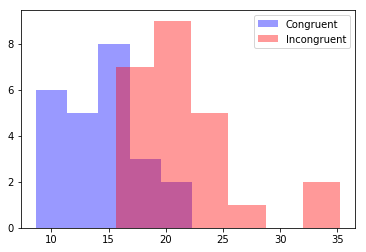

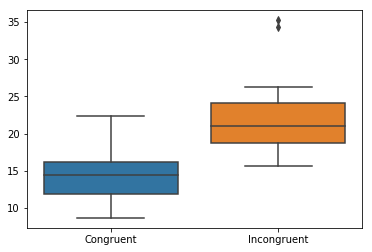

In [38]:
sns.distplot(df.Congruent, color="blue", axlabel=False, label="Congruent", kde=False)
sns.distplot(df.Incongruent, color="red", axlabel=False, label="Incongruent", kde=False)
plt.legend()
plt.show()

sns.boxplot(data=df)

Both Congruent and Incongruent are roughly normally distributed. Subjects generaly took more time to identify incongruent combinations, with their times being longer and also slightly more tightly distributed around the mean. For a few subjects (outliers to the right in the histogram and top in the boxplot), this task took as much as 35 seconds whereas the slowest in Congruent test was 21 seconds with no outliers. Given these findings it looks like there is considerable difference between the two groups, but we will do a paired t-test below to rigorously confirm.

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [40]:
import scipy.stats as stats
stats.ttest_rel(a=df.Congruent, b=df.Incongruent)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

A paired t-test is the most appropriate statistical test because these results are repeated samples from the same group. The critical statistic value for this test is -8.02 and the pvalue (confidence level) is 4.10 which means that the null hypthothesis cannot be rejected. These findings are counterintuitive in the sense that visual and numerical exploration of the data seem to support a substantial difference. However, the sample size (n) is only 24 people. Thus it is most accurate to say there is insufficient evidence to reject the null hypthesis. More evidence must be collected before a more concrete conclusion can be reached. 

*Resources Used:*
* https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html
* https://seaborn.pydata.org/generated/seaborn.distplot.html
* https://seaborn.pydata.org/generated/seaborn.boxplot.html